In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt

In [2]:
f1 = uproot.open("/home/lee/hd1/nuwro_files/checkout_prodnuwro_overlay_run2_PF.root")
f2 = uproot.open("/home/lee/hd1/nuwro_files/merged/checkout_prodnuwro_overlay_run3_PF.root")

print("f1:")
for x in f1.items():
    print(x)
print("f2:")
for x in f2.items():
    print(x)



f1:
('wcpselection;1', <ReadOnlyDirectory '/wcpselection' at 0x7f8c7fb27bd0>)
('wcpselection/T_eval;1', <TTree 'T_eval' (53 branches) at 0x7f8c7fef7010>)
('wcpselection/T_pot;1', <TTree 'T_pot' (6 branches) at 0x7f8c7fb82150>)
('wcpselection/T_PFeval;1', <TTree 'T_PFeval' (123 branches) at 0x7f8c7fbd0750>)
('wcpselection/T_BDTvars;1', <TTree 'T_BDTvars' (825 branches) at 0x7f8c005aee50>)
('wcpselection/T_KINEvars;1', <TTree 'T_KINEvars' (18 branches) at 0x7f8bc9512150>)
('FRH;1', <TH1D (version 2) at 0x7f8c7fb11990>)
('FRV;1', <TH1D (version 2) at 0x7f8bc947b410>)
('rICKR;1', <TH1D (version 2) at 0x7f8bc94b9810>)
('rICKI;1', <TH1D (version 2) at 0x7f8bc94bbc90>)
('PreC;1', <TH1D (version 2) at 0x7f8bc94fea10>)
('PostC;1', <TH1D (version 2) at 0x7f8bc94b4d10>)
('PostO;1', <TH1D (version 2) at 0x7f8bc94b7090>)
('PreD;1', <TH1D (version 2) at 0x7f8bc94f5390>)
('PostDO;1', <TH1D (version 2) at 0x7f8bc94f7750>)
('ER;1', <TH1D (version 2) at 0x7f8bc94e9710>)
f2:
('wcpselection;1', <ReadOnlyD

In [3]:
f1 = f1["wcpselection"]
f2 = f2["wcpselection"]


In [4]:
f1_var_names = []
for tree_name in [x[0] for x in f1.items()]:
    f1_var_names += [x[0] for x in f1[tree_name].items()]
f2_var_names = []
for tree_name in [x[0] for x in f2.items()]:
    f2_var_names += [x[0] for x in f2[tree_name].items()]

print("truth_daughters" in f1_var_names)
print("truth_daughters" in f2_var_names)

f1_not_f2 = set(f1_var_names).difference(set(f2_var_names))
f2_not_f1 = set(f2_var_names).difference(set(f1_var_names))

print("in old but not new:")
for x in f1_not_f2:
    print(x)

print("\nin new but not old:")
for x in f2_not_f1:
    print(x)


True
True
in old but not new:
shw_sp_vec_dQ_dx_4
shw_sp_min_dQ_dx_5
shw_sp_br3_3_v_length
shw_sp_vec_dQ_dx_2
shw_sp_pio_1_dis_2
shw_sp_br1_2_shower_length
shw_sp_pio_1_energy_2
shw_sp_n_vertex
shw_sp_E_indirect_max_energy
shw_sp_br3_5_v_total_length
shw_sp_hol_2_energy
shw_sp_br3_6_v_angle
shw_sp_br1_2_n_connected
shw_sp_lol_flag
shw_sp_br3_1_sg_flag_topology
shw_sp_pio_2_v_dis2
shw_sp_proton_length_2
shw_sp_br1_2_n_shower_segs
shw_sp_pio_1_flag
shw_sp_hol_2_ncount
shw_sp_vec_dQ_dx_14
shw_sp_vec_dQ_dx_15
shw_sp_max_dQ_dx_sample
shw_sp_br3_2_n_other
shw_sp_n_stem_size
shw_sp_lem_shower_main_length
shw_sp_medium_dQ_dx
shw_sp_proton_length_1
shw_sp_br3_2_total_length
shw_sp_br3_7_min_angle
shw_sp_br1_3_max_length_p
shw_sp_vec_dQ_dx_6
shw_sp_br1_1_flag_sg_topology
mcflux_ptype
reco_vec_showerKE
shw_sp_lowest_dQ_dx
shw_sp_br3_7_flag
shw_sp_br3_flag
shw_sp_br3_6_v_flag
shw_sp_lem_n_3seg
shw_sp_pio_mip_id
shw_sp_br1_3_flag
shw_sp_br_filled
shw_sp_br1_1_n_segs
shw_sp_br4_1_energy
shw_sp_br1_fl

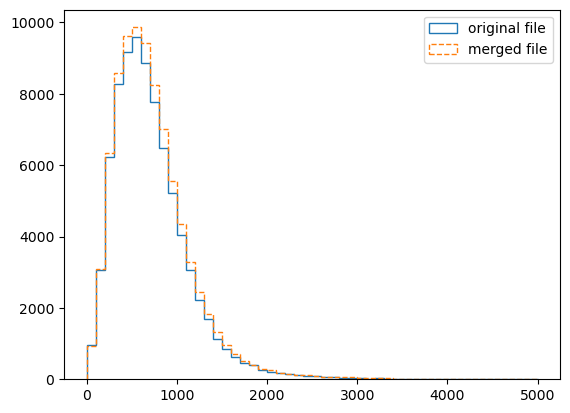

In [5]:
bins = np.linspace(0, 5000, 51)

plt.figure()
plt.hist(f1["T_KINEvars"]["kine_reco_Enu"].array(), bins=bins, histtype="step", label="original file")
plt.hist(f2["T_KINEvars"]["kine_reco_Enu"].array(), bins=bins, histtype="step", label="merged file", ls="dashed")
plt.legend()
plt.show()

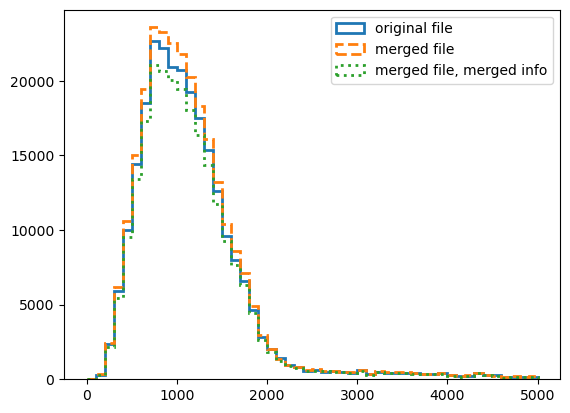

In [6]:
bins = np.linspace(0, 5000, 51)
lw=2

plt.figure()
plt.hist(f1["T_PFeval"]["truth_nuEnergy"].array(), bins=bins, histtype="step", label="original file", lw=lw)
plt.hist(f2["T_PFeval"]["truth_nuEnergy"].array(), bins=bins, histtype="step", label="merged file", ls="dashed", lw=lw)
plt.hist(f2["T_eval"]["pl_true_nu_energy"].array(), bins=bins, histtype="step", label="merged file, merged info", ls="dotted", lw=lw)
plt.legend()
plt.show()

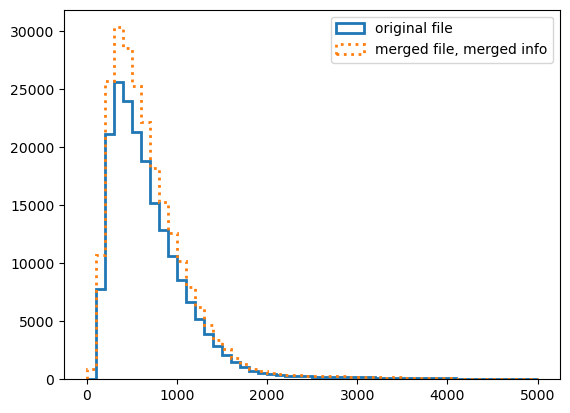

In [7]:
bins = np.linspace(0, 5000, 51)
lw=2

plt.figure()
plt.hist([1000*x[3] for x in f2["T_PFeval"]["truth_muonMomentum"].array()], bins=bins, histtype="step", label="original file", lw=lw)
plt.hist(f2["T_eval"]["pl_true_lep_energy"].array(), bins=bins, histtype="step", label="merged file, merged info", ls="dotted", lw=lw)
plt.legend()
plt.show()


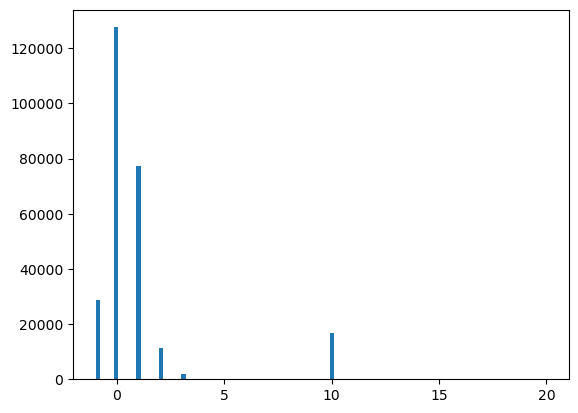

In [8]:
plt.figure()
plt.hist(f2["T_eval"]["pl_interaction_type"].array(), bins=100, range=(-1, 20))
plt.show()

In [9]:
f1["T_PFeval"]["truth_daughters"].array()

<Array [[[25, 26, ..., 190, 191], ...], ...] type='250190 * var * var * int32'>

In [10]:
f2["T_PFeval"]["truth_daughters"].array()

<Array [[[3, 4, 5, ..., 184, 185], ...], ...] type='263244 * var * var * int32'>

In [11]:
print([x[3] for x in f2["T_PFeval"]["truth_muonMomentum"].array()[:10]])
print([x for x in f2["T_eval"]["pl_true_lep_energy"].array()[:10]])

[1.044221, 1.2441049, 0.18057719, 0.49609178, -1.0, 0.30790627, 1.2644986, 0.96030945, 0.8231171, 0.33395502]
[1044.23, 1244.11, 180.577, 496.09198, 735.958, 307.906, 1264.5, 960.309, 823.117, 333.955]


In [12]:
print([x for x in f2["T_PFeval"]["truth_nuEnergy"].array()[:10]])
print([x for x in f2["T_eval"]["pl_true_nu_energy"].array()[:10]])

[1064.84, 2754.56, 1187.28, 795.493, 2896.47, 597.495, 1682.01, 1142.77, 1576.1599, 554.729]
[1064.84, 2754.56, 1187.28, 795.493, 2896.47, 597.495, 1682.01, 1142.77, 1576.1599, 554.729]
